In [1]:
#pip install ucimlrepo

# Packages
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#import random
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from sklearn.impute import SimpleImputer

URV                                                                            MESIIA

Neural and Evolutionary Computation (NEC)
Assignment 1: Prediction with Back-Propagation and Linear Regression

Teachers: Dr. Jordi Duch, Dr. Sergio Gomez

Student: Natzaret Gálvez Rísquez

Part 1: Selecting and analyzing the datasets

We perform the predictions on  three datasets: 

In [2]:
# We upload the datasets

# First dataset: File: A1-turbine.txt
    # 5 features: the first 4 are the input variables, the last one is the value to predict
    # 451 patterns: use the first 85% for training and validation, and the remaining 15% for test
df_turbine=pd.read_csv('C:/Users/Gari/Desktop/NEC/A1-turbine.txt', sep='\t', header=None)
header_vector_turbine = df_turbine.iloc[0, :].tolist() #header
df_turbine=df_turbine.iloc[1:,:-1]
df_turbine=pd.DataFrame(df_turbine)

# Second dataset: File: A1-synthetic.txt
    # 10 features: the first 9 are the input variables, the last one is the value to predict
    # 1000 patterns: use the first 80% for training and validation, and the remaining 20% for test
df_synthetic=pd.read_csv('C:/Users/Gari/Desktop/NEC/A1-synthetic.txt', sep='\t', header=None)
header_vector_synthetic = df_synthetic.iloc[0, :].tolist() #header
df_synthetic=df_synthetic.iloc[1:,:]
df_synthetic=pd.DataFrame(df_synthetic)

# Third dataset: from "https://archive.ics.uci.edu/dataset/186/wine+quality"
    # At least 6 features, one of them used for prediction
    # The prediction variable must take real (float or double) values; it should not represent a categorical value (that would correspond to a classification task)
    # At least 400 patterns
    # Select randomly 80% of the patterns for training and validation, and the remaining 20% for test; it is important to shuffle the original data, to destroy any kind of sorting it could have

# Wine Quality dataset [6497 rows x 11 columns]
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
df_wineQuality = wine_quality.data.features 
y = wine_quality.data.targets #quality of wine, an integer
  
# metadata 
#print(wine_quality.metadata) 
# variable information 
#print(wine_quality.variables) 

header_vector_wineQuality = df_wineQuality.columns.tolist() #header

In [3]:
print("Number of patterns of wine Quality:")
print(len(df_wineQuality)) 

Number of patterns of wine Quality:
6497


In [4]:
# As we can observe by the following header of the wine quality, alcohol level is the last feature
# We will use it as the value to predict
print(header_vector_wineQuality)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Now, we will do the data preprocessing to later do the data splitting.

In [5]:
# Handling missing values, we check for and handle any missing values in our datasets
# Categorical values, if there are categorical variables, we encode them appropriately
# Outliers, we identify and handle the outliers in the data
# Normalization, in case is needed

# Data Preprocessing for Dataset 1 and 2
# - Normalize input and output variables
# - No need to preprocess (datasets already cleaned)

# Data Preprocessing for Dataset 3
# - Link to the source webpage to the documentation: "https://archive.ics.uci.edu/dataset/186/wine+quality"
# - Check for missing values, represent categorical values, look for outliers
# - Normalize input/output variables if needed

In [6]:
##Turbine dataset
X_turbine = df_turbine.iloc[:, :-1]  # Features (all columns except the last one)
y_turbine = df_turbine.iloc[:, -1]   # Target variable (last column)

scaler_turbine = MinMaxScaler()
X_turbine_normalized = scaler_turbine.fit_transform(X_turbine)
y_turbine_normalized = scaler_turbine.fit_transform(y_turbine.values.reshape(-1, 1))

In [7]:
##Synthetic dataset
X_synthetic = df_synthetic.iloc[:, :-1]
y_synthetic = df_synthetic.iloc[:, -1]

# Normalize input and output variables
scaler_synthetic = MinMaxScaler()
X_synthetic_normalized = scaler_synthetic.fit_transform(X_synthetic)
y_synthetic_normalized = scaler_synthetic.fit_transform(y_synthetic.values.reshape(-1, 1))

In [8]:
##Wine Quality dataset
#By the owners we know that this dataset does not have missing values, we can check by:
missing_values_count = df_wineQuality.isnull().sum().sum()
print(f"Number of missing values in Wine Quality dataset: {missing_values_count}")

Number of missing values in Wine Quality dataset: 0


In [9]:
##Wine Quality dataset
# No categorical variables in this dataset
# Identify and handle outliers using IQR method
def handle_outliers_iqr(data, threshold=1.5):
    data_copy = data.copy()  # Create a copy to avoid SettingWithCopyWarning
    Q1 = data_copy.quantile(0.25)
    Q3 = data_copy.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    data_copy[(data_copy < lower_bound) | (data_copy > upper_bound)] = np.nan

    # Handle missing values using median imputation
    imputer = SimpleImputer(strategy='median')
    data_imputed = imputer.fit_transform(data_copy)
    
    # Convert back to DataFrame with original column names
    data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

    return data_imputed

# Handle outliers in all feature variables (columns) of df_wineQuality
df_wineQuality_no_outliers = handle_outliers_iqr(df_wineQuality)

# Shuffle
df_wineQuality_shuffled = df_wineQuality_no_outliers.sample(frac=1, random_state=42)

In [10]:
missing_values_count = df_wineQuality_shuffled.isnull().sum().sum()
print(f"Number of missing values in Wine Quality dataset: {missing_values_count}")

Number of missing values in Wine Quality dataset: 0


In [11]:
X_wineQuality = df_wineQuality_shuffled.iloc[:, :-1]
y_wineQuality = df_wineQuality_shuffled.iloc[:, -1]

# Normalize input and output variables
scaler_wineQuality = MinMaxScaler()
X_wineQuality_normalized_no_outliers = scaler_wineQuality.fit_transform(X_wineQuality)
y_wineQuality_normalized_no_outliers = scaler_wineQuality.fit_transform(y_wineQuality.values.reshape(-1, 1))

Now, we divide the datasets into validation & training and test.

In [12]:
#First dataset, turbine
# Split the data into validation-training and testing sets
# Extract the first 85% for training
# Extract the remaining 15% for testing
# Splitting Turbine dataset
X_train_turbine, X_test_turbine, y_train_turbine, y_test_turbine = train_test_split(
    X_turbine_normalized, y_turbine_normalized, test_size=0.15, shuffle=False
)

#Second dataset, synthetic
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(
    X_synthetic_normalized, y_synthetic_normalized, test_size=0.2, shuffle=False
)

#Third dataset, wineQuality
X_train_wineQuality, X_test_wineQuality, y_train_wineQuality, y_test_wineQuality = train_test_split(
    X_wineQuality_normalized_no_outliers,
    y_wineQuality_normalized_no_outliers,
    test_size=0.2,
    random_state=42,
)

# Print the sizes of the datasets
#print("Total data size:", len(df_wineQuality))
#print("Training data size:", len(df_wineQualityTrainingValidation))
#print("Test data size:", len(df_wineQualityTesting))

Part 2: Implementation of BP

Neural network with back propagation

    We will implement all the necessary methods in order for the network to learn.
We will based the implementation on the algorithm and equations in the following document [G]:
 -https://campusvirtual.urv.cat/mod/resource/view.php?id=3657931

    Moreover, the class MyNeuralNetwork will provide three public functions that can be called externally:
-fit (X, y): has 2 parameters: an array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and a vector y of size (n_samples), which holds the target 
values (class labels) for the training samples. This method allows us to train the network with this data

-predict (X): has 1 parameter, an array X of size (n_samples, n_features) that contains the samples. This method returns a vector with the predicted values for all the input samples

-loss_epochs: returns 2 arrays of size (n_epochs, 2) that contain the evolution of the training error and the validation error for each of the epochs of the system, so this information can be plotted


In [13]:
# Neural network with back propagation

# The class MyNeuralNetwork will receive all these parameters in the class constructor:
# n_units: array indicating the number of units in each layer, so, the length of this array will be the number of layers
# epochs: number of epochs
# learning_rate
# momentum
# activation: the selected activation function (sigmoid, relu, linear, tanh)
# validation_percentage: the percentage of data that should be used as the validation set


class MyNeuralNetwork:
    def __init__(self, n_units, epochs, learning_rate, momentum, activation, validation_percentage):
        self.L = len(n_units) - 1 # L: number of layers
        self.n = n_units # n: an array with the number of units in each layer (including the input and output layers)
        
        self.h = [0] * (self.L + 1) # h: an array of arrays for the fields (h)
        self.xi = [0] * (self.L + 1) # xi: an array of arrays for the activations (ξ)
        self.w = [0] * (self.L + 1) # w: an array of matrices for the weights (w)
        self.theta = [0] * (self.L + 1) # theta: an array of arrays for the thresholds (θ)
        self.delta = [0] * (self.L + 1) # delta: an array of arrays for the propagation of errors (Δ)
        self.d_w = [0] * (self.L + 1) # d_w: an array of matrices for the changes of the weights (δw)
        self.d_theta = [0] * (self.L + 1) # d_theta: an array of arrays for the changes of the weights (δθ)
        self.d_w_prev = [0] * (self.L + 1) # d_w_prev: an array of matrices for the previous changes of the weights, used for the momentum term (δw(prev))
        self.d_theta_prev = [0] * (self.L + 1) # d_theta_prev: an array of arrays for the previous changes of the thresholds, used for the momentum term (δθ(prev))
        

       # Initialize arrays of arrays and arrays of matrices
        for i in range(0, self.L):
            self.h[i] = np.zeros(n_units[i])  # Initialize fields (h) as arrays of zeros
            self.xi[i] = np.zeros(n_units[i])  # Initialize activations (ξ) as arrays of zeros
            self.theta[i] = np.random.randn(n_units[i])  # Initialize thresholds (θ) as arrays of zeros
            self.delta[i] = np.zeros(n_units[i])  # Initialize propagation of errors (Δ) as arrays of zeros
            self.d_theta[i] = np.zeros(n_units[i])  # Initialize changes of weights (δθ) as arrays of zeros
            self.d_theta_prev[i] = np.zeros(n_units[i]) # Initialize previous changes of thresholds (δθ(prev)) as arrays of zeros

            # Initialize weights (w) as matrices with appropriate dimensions
            self.w[i+1] = np.random.randn(n_units[i+1], n_units[i])

            # Initialize changes of weights (δw) and previous changes of weights (δw(prev)) as matrices with appropriate dimensions
            self.d_w[i+1] = np.zeros((n_units[i+1], n_units[i]))
            self.d_w_prev[i+1] = np.zeros((n_units[i+1], n_units[i]))


        self.fact = activation # fact: the name of the activation function that it will be used. It can be one of these four: sigmoid, relu, linear, tanh.
        
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.validation_percentage = validation_percentage

        self.training_errors = []
        self.validation_errors = []

    # Function fit (X, y): to train the network with the data given by the parameters
    def fit(self, X, y):
        # Split the data into training and validation sets
        if self.validation_percentage > 0:
            num_validation = int(self.validation_percentage * X.shape[0])
            X_train, y_train = X[:-num_validation], y[:-num_validation]
            X_val, y_val = X[-num_validation:], y[-num_validation:]
        else:
            X_train, y_train = X, y

        for epoch in range(self.epochs):
            # Iterate over each training example
            for pat in range(X_train.shape[0]):

                # Feed-forward propagation from pattern X_train[] to obtain the output o(X_train[])
                # Set the input layer activation
                self.xi[1] = X_train[pat] #randomPattern_X_train
                # Calculate and store the activations of the neurons in each layer
                for l in range(2, self.L + 1):
                    self.h[l] = np.dot(self.w[l], self.xi[l-1]) - self.theta[l]
                    self.xi[l] = self.activation_function(self.h[l])
                #outputFeedForward= self.xi[self.L]

                # Error backward propagation
                # First, we compute a set of auxiliary variables
                self.delta[self.L] = self.activation_function_derivative(self.xi[self.L]) * (self.xi[self.L] - y_train[pat])
                # And then, we back propagate to the rest of the network
                for l in range(self.L - 1, 1, -1): #for l in reversed(range(self.L + 1)):
                    self.delta[l] = self.activation_function_derivative(self.xi[l]) * np.dot(self.delta[l+1], self.w[l+1])

                # Update weights and thresholds
                # In case that the prediction coincides with the desired output no modification of weights and thresholds is necessary
                # delta[l]=0
                if self.delta != 0:
                    for l in range(2, self.L + 1):
                        self.d_w[l] = -self.learning_rate * np.outer(self.delta[l], self.xi[l-1]) + self.momentum*self.d_w_prev[l]
                        #self.d_w[l] = -self.learning_rate * np.outer(self.delta[l], self.xi[l-1]) + self.momentum*self.d_w_prev[l]
                        self.d_theta[l] = self.learning_rate * self.delta[l] + self.momentum*self.d_theta_prev[l]
                        #self.d_theta[l] = self.learning_rate * self.delta[l] + self.momentum*self.d_theta_prev[l]
                        self.w[l] += self.d_w[l]
                        self.theta[l] += self.d_theta[l]

            # Due to the fact that the function predict() is based on a feed-foward propagation, we can use it in here    
            # Feed-forward propagation all training patterns
            predictions_train = self.predict(X_train)
            # Calculate the trainig error
            error_train = np.mean((predictions_train - y_train) ** 2)
            self.training_errors.append(error_train)
            # Feed-forward propagation all validation patterns
            if self.validation_percentage > 0:
                predictions_val = self.predict(X_val)
                # Calculat the training error
                error_val = np.mean((predictions_val - y_val) ** 2)
                self.validation_errors.append(error_val)

    
    # Function predict(X): returns a vector with the predicted values for all the input samples
    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            self.xi[1] = X[i]
            for l in range(2, self.L + 1):
                self.h[l] = np.dot(self.w[l], self.xi[l-1]) + self.theta[l]
                self.xi[l] = self.activation_function(self.h[l])
            predictions.append(self.xi[self.L])
        return np.array(predictions)
    
    # Function that will return the evolution of the training error and the validation error for each of the epochs of the system
    def loss_epochs(self):
        return np.array(self.training_errors), np.array(self.validation_errors) # 2 arrays of size (n_epochs, 2) that contain the evolution of 
                                                                                # the training error and the validation error for each of the epochs of the system

    def activation_function(self, x):
        if self.fact == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.fact == 'linear':
            return x
        elif self.fact == 'tanh':
            return np.tanh(x)
        elif self.fact == 'relu':
            return np.maximum(0, x)
        else:
            raise ValueError("Invalid activation function type.")

    def activation_function_derivative(self, x):
        if self.fact == 'sigmoid':
            return x * (1 - x)
        elif self.fact == 'linear':
            return 1
        elif self.fact == 'tanh':
            return 1 - np.tanh(x)**2
        elif self.fact == 'relu':
            return np.where(x > 0, 1, 0)
        else:
            raise ValueError("Invalid activation function type.")
        
    # We use cross validation to find parameters that give the lower value for the global error using the neural network build
    def cross_validate(self, X, y, n_folds=4):
        kf = KFold(n_splits=n_folds, shuffle=True)
        validation_errors = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            self.fit(X_train, y_train)
            predictions_val = self.predict(X_val)
            error_val = np.mean((predictions_val - y_val) ** 2)
            validation_errors.append(error_val)

        global_expected_error = np.mean(validation_errors)
        return global_expected_error

Part 3: Obtaining and comparing predictions using the three models (BP, BP-F, MLR-F)

To compute the quality of a prediction, we will use the mean absolute percentage error (MAPE), given by:
𝐸(%) = 100 ∑𝜇|(𝑦^𝜇 − 𝑧^𝜇)/𝑧^𝜇|

Where the best way to visualize the results is with scatter plots of the prediction value 𝑦^𝜇
compared with the real value z^𝜇. The closer the points are to the diagonal, the better the prediction.

Part 3.1: Parameter comparison and selection

    First of all, before caculating the mape we will look for the parameters that will give us the lower error value using our neural network testing it with cross-validation for n folds 4

We will use the second dataset (A1-synthetic) due to its variables for first trying to finde the best parameters.

Dataset 2: A1-synthetic

In [14]:
model = MyNeuralNetwork(n_units=[1, 9, 9, 1], epochs=1000, learning_rate=0.01, momentum=0.4, activation='sigmoid', validation_percentage=0.30)
global_expected_error = model.cross_validate(X_train_synthetic, y_train_synthetic)
print("Global expected error")
print(global_expected_error)

Global expected error
0.34778763072536834


In [13]:
model = MyNeuralNetwork(n_units=[1, 9, 9, 1], epochs=1000, learning_rate=0.01, momentum=0.9, activation='sigmoid', validation_percentage=0.30)
global_expected_error = model.cross_validate(X_train_synthetic, y_train_synthetic)
print("Global expected error")
print(global_expected_error)

Global expected error
0.3052348942888455


In [14]:
model = MyNeuralNetwork(n_units=[1, 9, 9, 1], epochs=1000, learning_rate=0.01, momentum=0.9, activation='sigmoid', validation_percentage=0.20)
global_expected_error = model.cross_validate(X_train_synthetic, y_train_synthetic)
print("Global expected error")
print(global_expected_error)

Global expected error
0.35651366328947365


This were the parameters that give the lower global expected error, we use them in order to get the MAPE.
Some of them were changed in order to get lower MAPE value.

In [26]:
# Create an instance of MyNeuralNetwork and train the model
# We choose the parameters with the best results
model = MyNeuralNetwork(n_units=[1, 9, 9, 1], epochs=1000, learning_rate=0.01, momentum=0.9, activation='sigmoid', validation_percentage=0.30)
#training_error, validation_error = model.fit(X_train_synthetic, y_train_synthetic)
model.fit(X_train_synthetic, y_train_synthetic)

# Make predictions using the trained model
predictions = model.predict(X_test_synthetic)
#print(predictions)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((predictions - y_test_synthetic)/y_test_synthetic))
print("Mean absolute percentage error")
print(mape, "%")

Mean absolute percentage error
25.150224115587378 %


The output values of the neural network and also the input values are all normalized with min-max scaler. In order to represent a plot of the prediction values vs real values we will denormalize them.

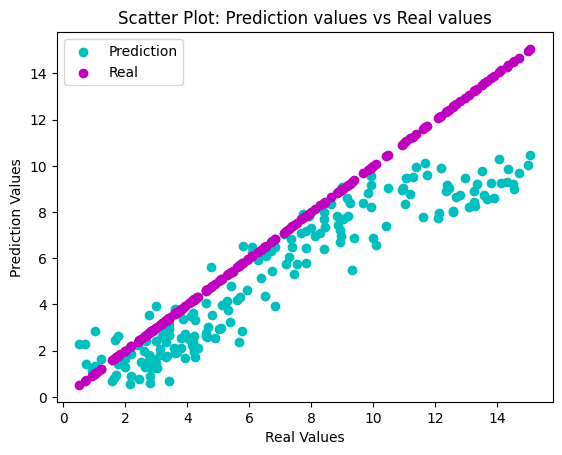

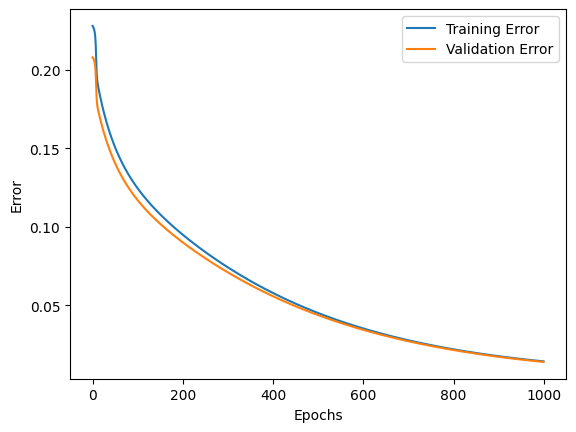

In [27]:
# De-normalize the prediction values and real values
denormalizedPredictionResults = scaler_synthetic.inverse_transform(predictions)
denormalizedRealResults = scaler_synthetic.inverse_transform(y_test_synthetic)

# Scatter plot of the prediction values vs real values
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

# Evolution of the training and validation error as a function of the number of epochs
# Dataset 2: A1-synthetic
training_errors, validation_errors = model.loss_epochs()
plt.plot(training_errors, label='Training Error')
plt.plot(validation_errors, label='Validation Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [17]:
model = MyNeuralNetwork(n_units=[1, 9, 9, 1], epochs=1000, learning_rate=0.01, momentum=0.4, activation='sigmoid', validation_percentage=0.30)
global_expected_error = model.cross_validate(X_train_synthetic, y_train_synthetic)
print("Global expected error")
print(global_expected_error)
#training_error, validation_error = model.fit(X_train_synthetic, y_train_synthetic)
model.fit(X_train_synthetic, y_train_synthetic)
# Make predictions using the trained model
predictions = model.predict(X_test_synthetic)
# We calculate the MAPE
mape = 100 * np.mean(np.abs((predictions - y_test_synthetic)/y_test_synthetic))
print("Mean absolute percentage error")
print(mape, "%")

Global expected error
0.09371898640208784
Mean absolute percentage error
118.34596955844971 %


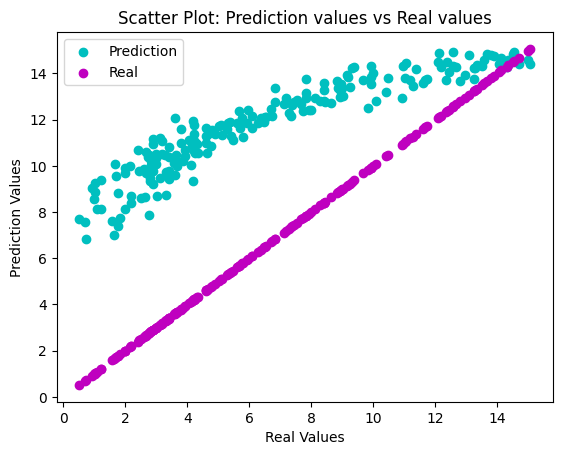

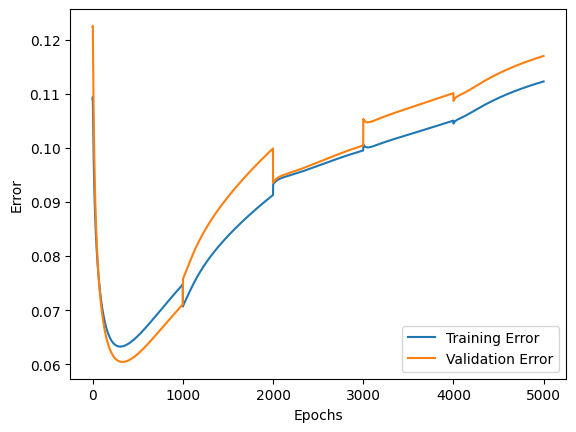

In [18]:
# De-normalize the prediction values and real values
denormalizedPredictionResults = scaler_synthetic.inverse_transform(predictions)
denormalizedRealResults = scaler_synthetic.inverse_transform(y_test_synthetic)

# Scatter plot of the prediction values vs real values
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

# Evolution of the training and validation error as a function of the number of epochs
# Dataset 2: A1-synthetic
training_errors, validation_errors = model.loss_epochs()
plt.plot(training_errors, label='Training Error')
plt.plot(validation_errors, label='Validation Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [19]:
model = MyNeuralNetwork(n_units=[1, 9, 9, 1], epochs=1000, learning_rate=0.02, momentum=0.4, activation='sigmoid', validation_percentage=0.30)
global_expected_error = model.cross_validate(X_train_synthetic, y_train_synthetic)
print("Global expected error")
print(global_expected_error)
#training_error, validation_error = model.fit(X_train_synthetic, y_train_synthetic)
model.fit(X_train_synthetic, y_train_synthetic)
# Make predictions using the trained model
predictions = model.predict(X_test_synthetic)
# We calculate the MAPE
mape = 100 * np.mean(np.abs((predictions - y_test_synthetic)/y_test_synthetic))
print("Mean absolute percentage error")
print(mape, "%")

Global expected error
0.35987779966395766
Mean absolute percentage error
219.74340564715962 %


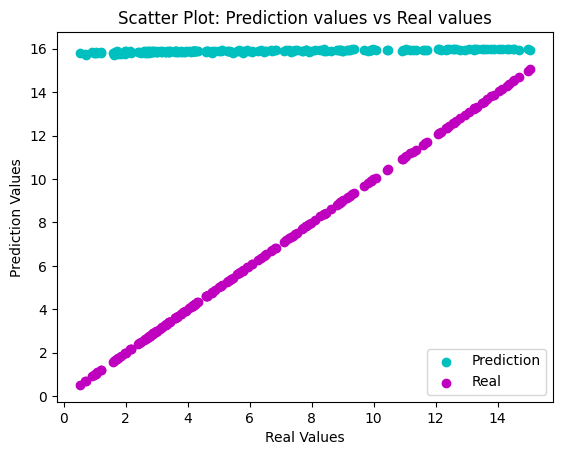

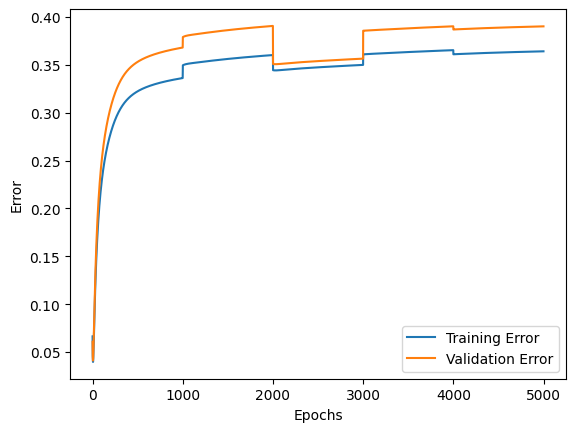

In [20]:
# De-normalize the prediction values and real values
denormalizedPredictionResults = scaler_synthetic.inverse_transform(predictions)
denormalizedRealResults = scaler_synthetic.inverse_transform(y_test_synthetic)

# Scatter plot of the prediction values vs real values
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

# Evolution of the training and validation error as a function of the number of epochs
# Dataset 2: A1-synthetic
training_errors, validation_errors = model.loss_epochs()
plt.plot(training_errors, label='Training Error')
plt.plot(validation_errors, label='Validation Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Dataset 1: A1-turbine

In [18]:
# A1-turbine


# Create an instance of MyNeuralNetwork and train the model
# We choose the parameters with the best results
model = MyNeuralNetwork(n_units=[3, 4, 9, 9, 1], epochs=1000, learning_rate=0.01, momentum=0.4, activation='sigmoid', validation_percentage=0.30)
global_expected_error = model.cross_validate(X_train_turbine, y_train_turbine)
print("Global expected error")
print(global_expected_error)

#training_error, validation_error = model.fit(X_train_synthetic, y_train_synthetic)
model.fit(X_train_turbine, y_train_turbine)

# Make predictions using the trained model
predictions = model.predict(X_test_turbine)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((predictions - y_test_turbine)/y_test_turbine))
print("Mean absolute percentage error")
print(mape, "%")

Global expected error
0.06200475445547078
Mean absolute percentage error
72.6310050824608 %


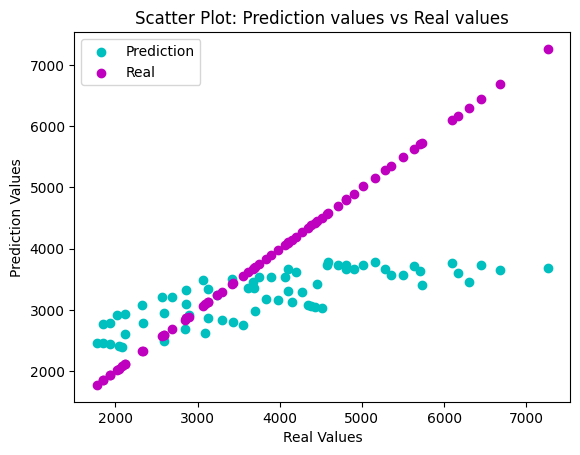

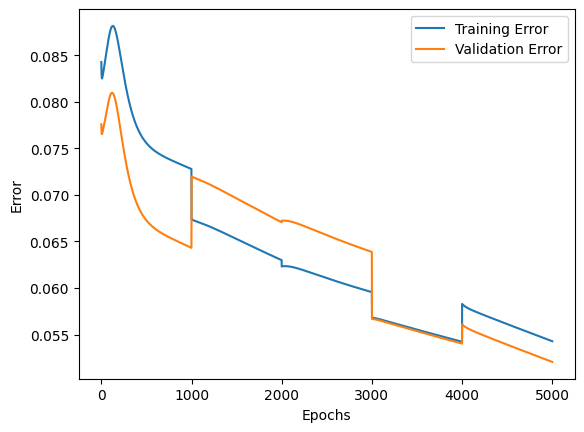

In [19]:
# A1-turbine

# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_turbine.inverse_transform(predictions)
denormalizedRealResults = scaler_turbine.inverse_transform(y_test_turbine)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

# Evolution of the training and validation error as a function of the number of epochs
training_errors, validation_errors = model.loss_epochs()
plt.plot(training_errors, label='Training Error')
plt.plot(validation_errors, label='Validation Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [67]:
# Create an instance of MyNeuralNetwork and train the model
# We choose the parameters with the best results
model = MyNeuralNetwork(n_units=[3, 4, 9, 9, 1], epochs=1000, learning_rate=0.02, momentum=0.9, activation='sigmoid', validation_percentage=0.30)
global_expected_error = model.cross_validate(X_train_turbine, y_train_turbine)
print("Global expected error")
print(global_expected_error)

#training_error, validation_error = model.fit(X_train_synthetic, y_train_synthetic)
model.fit(X_train_turbine, y_train_turbine)

# Make predictions using the trained model
predictions = model.predict(X_test_turbine)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((predictions - y_test_turbine)/y_test_turbine))
print("Mean absolute percentage error")
print(mape, "%")

Global expected error
0.014192085447307445
Mean absolute percentage error
32.42612689881309 %


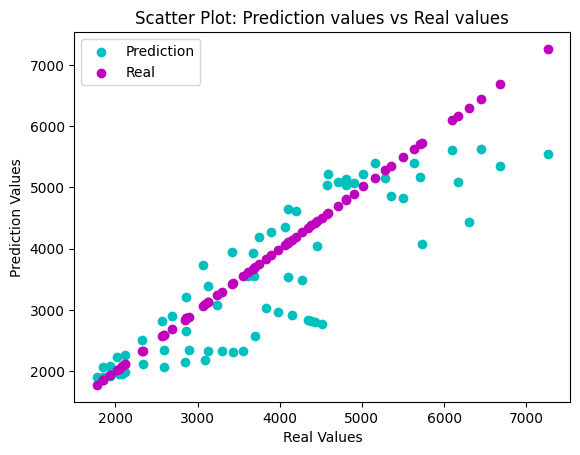

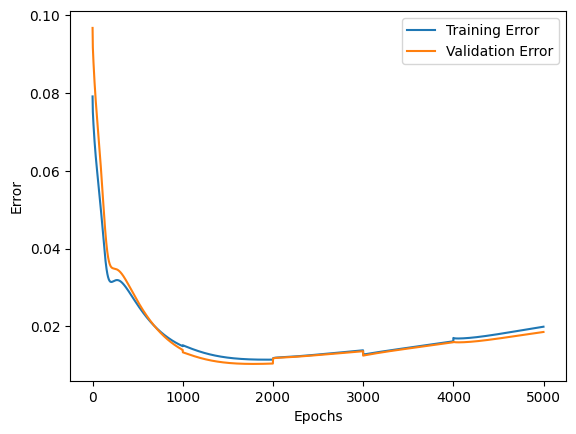

In [68]:
# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_turbine.inverse_transform(predictions)
denormalizedRealResults = scaler_turbine.inverse_transform(y_test_turbine)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

# Evolution of the training and validation error as a function of the number of epochs
training_errors, validation_errors = model.loss_epochs()
plt.plot(training_errors, label='Training Error')
plt.plot(validation_errors, label='Validation Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [22]:
# Create an instance of MyNeuralNetwork and train the model
# We choose the parameters with the best results
model = MyNeuralNetwork(n_units=[3, 4, 5, 9, 1], epochs=1000, learning_rate=0.08, momentum=0.5, activation='sigmoid', validation_percentage=0.30)
global_expected_error = model.cross_validate(X_train_turbine, y_train_turbine)
print("Global expected error")
print(global_expected_error)

#training_error, validation_error = model.fit(X_train_synthetic, y_train_synthetic)
model.fit(X_train_turbine, y_train_turbine)

# Make predictions using the trained model
predictions = model.predict(X_test_turbine)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((predictions - y_test_turbine)/y_test_turbine))
print("Mean absolute percentage error")
print(mape, "%")

Global expected error
0.027614129842994543
Mean absolute percentage error
68.45371642140582 %


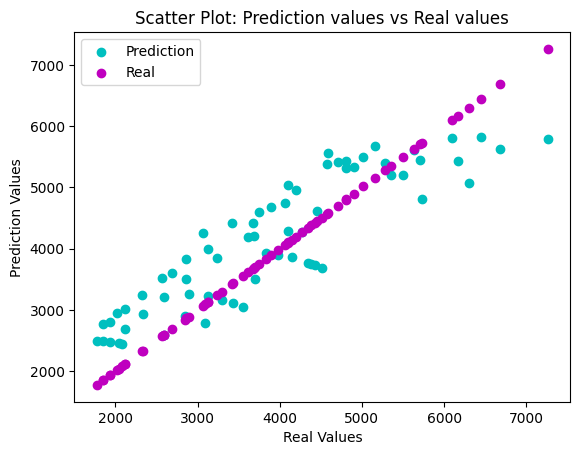

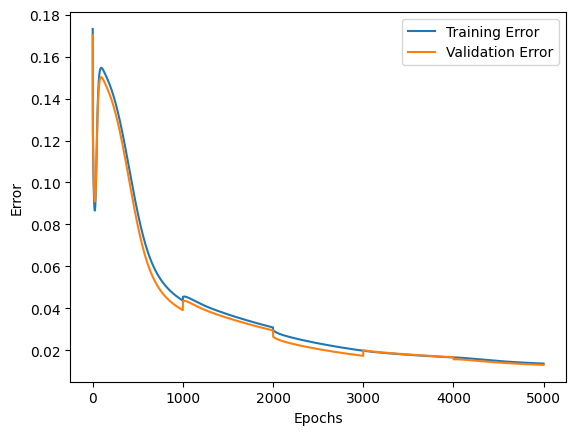

In [23]:
# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_turbine.inverse_transform(predictions)
denormalizedRealResults = scaler_turbine.inverse_transform(y_test_turbine)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

# Evolution of the training and validation error as a function of the number of epochs
training_errors, validation_errors = model.loss_epochs()
plt.plot(training_errors, label='Training Error')
plt.plot(validation_errors, label='Validation Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Dataset 3: wine Quality

In [72]:
# wineQuality

# Create an instance of MyNeuralNetwork and train the model
# We choose the parameters with the best results
model = MyNeuralNetwork(n_units=[3, 10, 5, 9, 1], epochs=1000, learning_rate=0.08, momentum=0.5, activation='sigmoid', validation_percentage=0.30)
global_expected_error = model.cross_validate(X_train_wineQuality, y_train_wineQuality)
print("Global expected error")
print(global_expected_error)

#training_error, validation_error = model.fit(X_train_synthetic, y_train_synthetic)
model.fit(X_train_wineQuality, y_train_wineQuality)

# Make predictions using the trained model
predictions = model.predict(X_test_wineQuality)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((predictions - y_test_wineQuality)/y_test_wineQuality))
print("Mean absolute percentage error")
print(mape, "%")

Global expected error
0.11092291721101098
Mean absolute percentage error
38.13066473505371 %


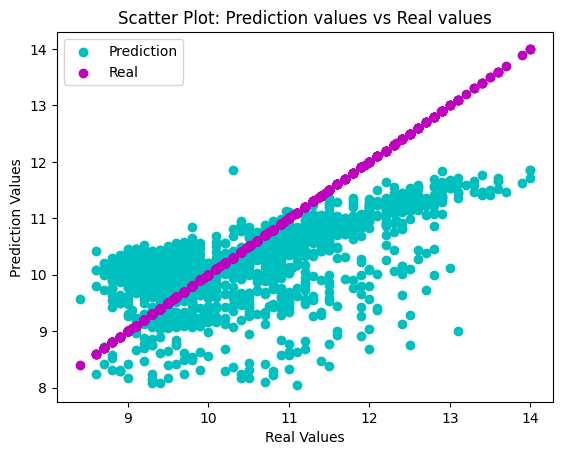

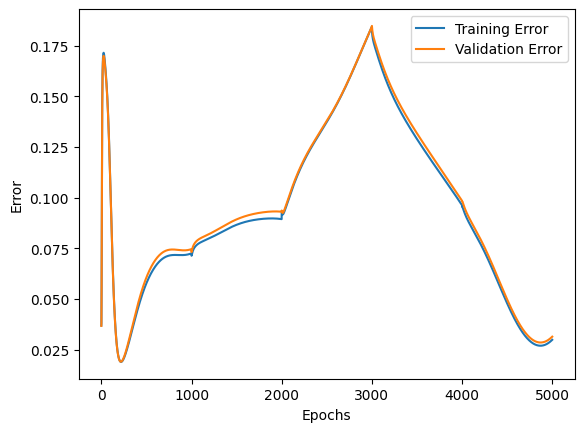

In [74]:
# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_wineQuality.inverse_transform(predictions)
denormalizedRealResults = scaler_wineQuality.inverse_transform(y_test_wineQuality)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

# Evolution of the training and validation error as a function of the number of epochs
training_errors, validation_errors = model.loss_epochs()
plt.plot(training_errors, label='Training Error')
plt.plot(validation_errors, label='Validation Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [75]:
# Create an instance of MyNeuralNetwork and train the model
# We choose the parameters with the best results
model = MyNeuralNetwork(n_units=[1, 10, 9, 1], epochs=1000, learning_rate=0.01, momentum=0.4, activation='sigmoid', validation_percentage=0.30)
global_expected_error = model.cross_validate(X_train_wineQuality, y_train_wineQuality)
print("Global expected error")
print(global_expected_error)

#training_error, validation_error = model.fit(X_train_synthetic, y_train_synthetic)
model.fit(X_train_wineQuality, y_train_wineQuality)

# Make predictions using the trained model
predictions = model.predict(X_test_wineQuality)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((predictions - y_test_wineQuality)/y_test_wineQuality))
print("Mean absolute percentage error")
print(mape, "%")

Global expected error
0.043984288252688596
Mean absolute percentage error
49.496492267605845 %


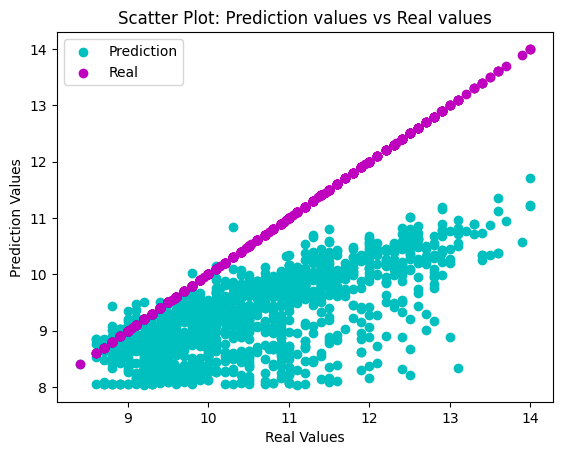

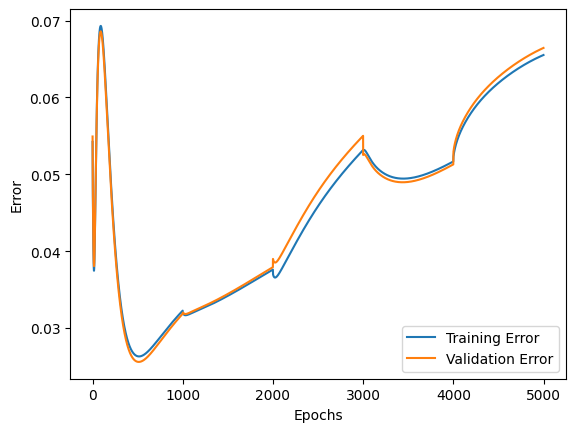

In [77]:
# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_wineQuality.inverse_transform(predictions)
denormalizedRealResults = scaler_wineQuality.inverse_transform(y_test_wineQuality)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

# Evolution of the training and validation error as a function of the number of epochs
training_errors, validation_errors = model.loss_epochs()
plt.plot(training_errors, label='Training Error')
plt.plot(validation_errors, label='Validation Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [86]:
# Create an instance of MyNeuralNetwork and train the model
# We choose the parameters with the best results
model = MyNeuralNetwork(n_units=[1, 10, 9, 1], epochs=1000, learning_rate=0.02, momentum=0.9, activation='sigmoid', validation_percentage=0.30)
global_expected_error = model.cross_validate(X_train_wineQuality, y_train_wineQuality)
print("Global expected error")
print(global_expected_error)

#training_error, validation_error = model.fit(X_train_synthetic, y_train_synthetic)
model.fit(X_train_wineQuality, y_train_wineQuality)

# Make predictions using the trained model
predictions = model.predict(X_test_wineQuality)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((predictions - y_test_wineQuality)/y_test_wineQuality))
print("Mean absolute percentage error")
print(mape, "%")

Global expected error
0.1277440023131021
Mean absolute percentage error
85.95862518867922 %


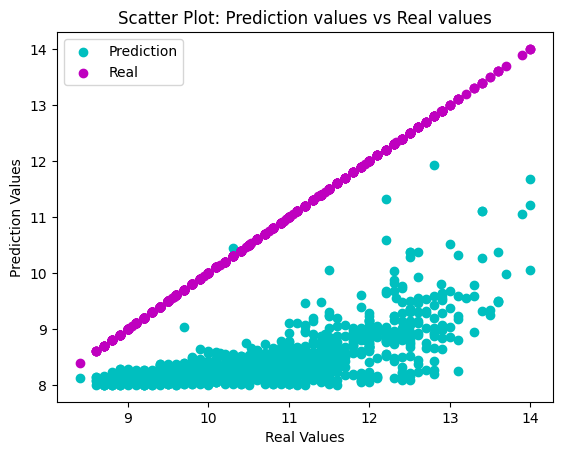

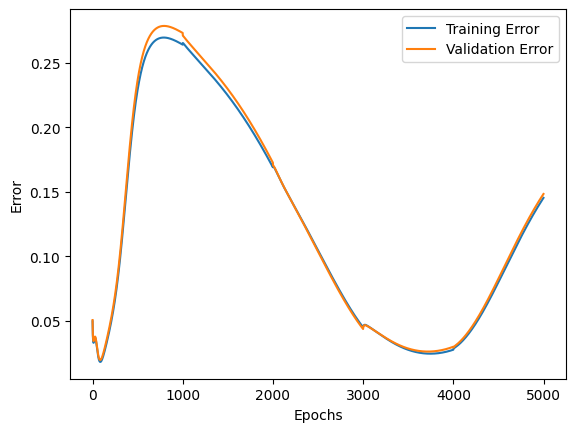

In [89]:
# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_wineQuality.inverse_transform(predictions)
denormalizedRealResults = scaler_wineQuality.inverse_transform(y_test_wineQuality)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

# Evolution of the training and validation error as a function of the number of epochs
training_errors, validation_errors = model.loss_epochs()
plt.plot(training_errors, label='Training Error')
plt.plot(validation_errors, label='Validation Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Part 3.2: Model result comparison

In [95]:
# Multi-linear regression model from scikit-learn
# Create an instance of the LinearRegression model
model = LinearRegression()


# Dataset 1: A1-turbine
# Fit the model to the training data
model.fit(X_train_turbine, y_train_turbine)
# Make predictions on the test set
y_pred = model.predict(X_test_turbine)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((y_pred - y_test_turbine)/y_test_turbine))
print("Mean absolute percentage error")
print(mape, "%")

Mean absolute percentage error
22.065552878592303 %


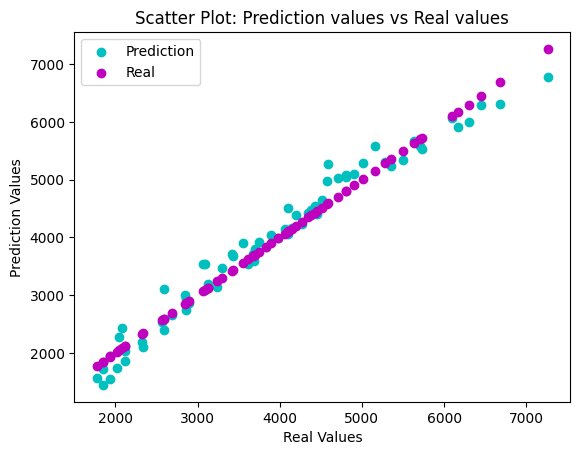

In [96]:
# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_turbine.inverse_transform(y_pred)
denormalizedRealResults = scaler_turbine.inverse_transform(y_test_turbine)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [97]:
# Dataset 2: A1-synthetic
# Fit the model to the training data
model.fit(X_train_synthetic, y_train_synthetic)
# Make predictions on the test set
y_pred = model.predict(X_test_synthetic)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((y_pred - y_test_synthetic)/y_test_synthetic))
print("Mean absolute percentage error")
print(mape, "%")

Mean absolute percentage error
9.254500672956127 %


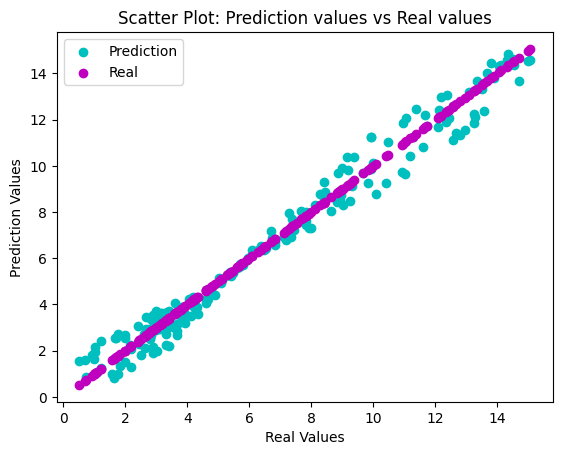

In [98]:
# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_synthetic.inverse_transform(y_pred)
denormalizedRealResults = scaler_synthetic.inverse_transform(y_test_synthetic)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [99]:
# Dataset 3: wineQuality
# Fit the model to the training data
model.fit(X_train_wineQuality, y_train_wineQuality)
# Make predictions on the test set
y_pred = model.predict(X_test_wineQuality)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((y_pred - y_test_wineQuality)/y_test_wineQuality))
print("Mean absolute percentage error")
print(mape, "%")

Mean absolute percentage error
28.58020168047449 %


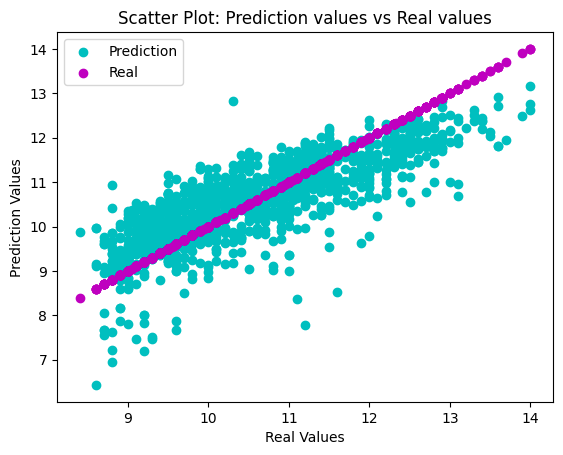

In [100]:
# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_wineQuality.inverse_transform(y_pred)
denormalizedRealResults = scaler_wineQuality.inverse_transform(y_test_wineQuality)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [117]:
# A neural network model, which can be used from Tensorflow, Scikit-learn or any other python library

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Dataset 1: A1-turbine
# Fit the model to the training data
model.fit(X_train_turbine, y_train_turbine, epochs=1000, batch_size=32, verbose=2)
# Make predictions on the test set
y_pred = model.predict(X_test_turbine)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((y_pred - y_test_turbine)/y_test_turbine))
print("Mean absolute percentage error")
print(mape, "%")

Epoch 1/1000
12/12 - 1s - loss: 0.4620 - 1s/epoch - 97ms/step
Epoch 2/1000
12/12 - 0s - loss: 0.3324 - 16ms/epoch - 1ms/step
Epoch 3/1000
12/12 - 0s - loss: 0.2358 - 69ms/epoch - 6ms/step
Epoch 4/1000
12/12 - 0s - loss: 0.1690 - 20ms/epoch - 2ms/step
Epoch 5/1000
12/12 - 0s - loss: 0.1243 - 19ms/epoch - 2ms/step
Epoch 6/1000
12/12 - 0s - loss: 0.0964 - 20ms/epoch - 2ms/step
Epoch 7/1000
12/12 - 0s - loss: 0.0801 - 23ms/epoch - 2ms/step
Epoch 8/1000
12/12 - 0s - loss: 0.0708 - 18ms/epoch - 1ms/step
Epoch 9/1000
12/12 - 0s - loss: 0.0659 - 17ms/epoch - 1ms/step
Epoch 10/1000
12/12 - 0s - loss: 0.0637 - 17ms/epoch - 1ms/step
Epoch 11/1000
12/12 - 0s - loss: 0.0626 - 18ms/epoch - 1ms/step
Epoch 12/1000
12/12 - 0s - loss: 0.0620 - 19ms/epoch - 2ms/step
Epoch 13/1000
12/12 - 0s - loss: 0.0619 - 19ms/epoch - 2ms/step
Epoch 14/1000
12/12 - 0s - loss: 0.0617 - 17ms/epoch - 1ms/step
Epoch 15/1000
12/12 - 0s - loss: 0.0616 - 16ms/epoch - 1ms/step
Epoch 16/1000
12/12 - 0s - loss: 0.0616 - 19ms/epo

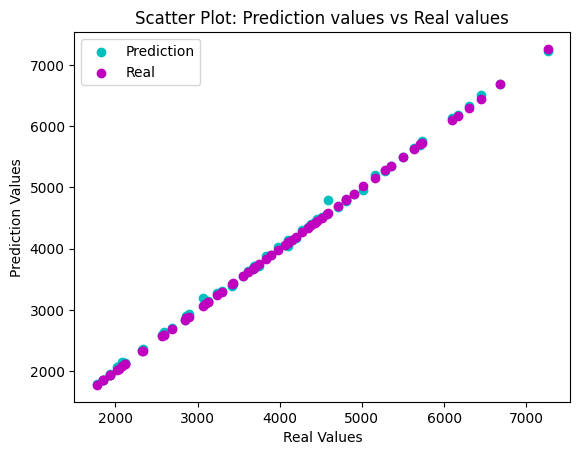

In [118]:
# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_turbine.inverse_transform(y_pred)
denormalizedRealResults = scaler_turbine.inverse_transform(y_test_turbine)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [119]:
# Dataset 2: A1-synthetic

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')
# Fit the model to the training data
model.fit(X_train_synthetic, y_train_synthetic, epochs=1000, batch_size=32, verbose=2)
# Make predictions on the test set
y_pred = model.predict(X_test_synthetic)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((y_pred - y_test_synthetic)/y_test_synthetic))
print("Mean absolute percentage error")
print(mape, "%")

Epoch 1/1000
25/25 - 1s - loss: 0.1220 - 834ms/epoch - 33ms/step
Epoch 2/1000
25/25 - 0s - loss: 0.0537 - 37ms/epoch - 1ms/step
Epoch 3/1000
25/25 - 0s - loss: 0.0486 - 41ms/epoch - 2ms/step
Epoch 4/1000
25/25 - 0s - loss: 0.0472 - 38ms/epoch - 2ms/step
Epoch 5/1000
25/25 - 0s - loss: 0.0458 - 33ms/epoch - 1ms/step
Epoch 6/1000
25/25 - 0s - loss: 0.0444 - 34ms/epoch - 1ms/step
Epoch 7/1000
25/25 - 0s - loss: 0.0428 - 30ms/epoch - 1ms/step
Epoch 8/1000
25/25 - 0s - loss: 0.0410 - 32ms/epoch - 1ms/step
Epoch 9/1000
25/25 - 0s - loss: 0.0390 - 33ms/epoch - 1ms/step
Epoch 10/1000
25/25 - 0s - loss: 0.0366 - 34ms/epoch - 1ms/step
Epoch 11/1000
25/25 - 0s - loss: 0.0340 - 31ms/epoch - 1ms/step
Epoch 12/1000
25/25 - 0s - loss: 0.0311 - 32ms/epoch - 1ms/step
Epoch 13/1000
25/25 - 0s - loss: 0.0276 - 32ms/epoch - 1ms/step
Epoch 14/1000
25/25 - 0s - loss: 0.0240 - 37ms/epoch - 1ms/step
Epoch 15/1000
25/25 - 0s - loss: 0.0203 - 30ms/epoch - 1ms/step
Epoch 16/1000
25/25 - 0s - loss: 0.0165 - 32ms/

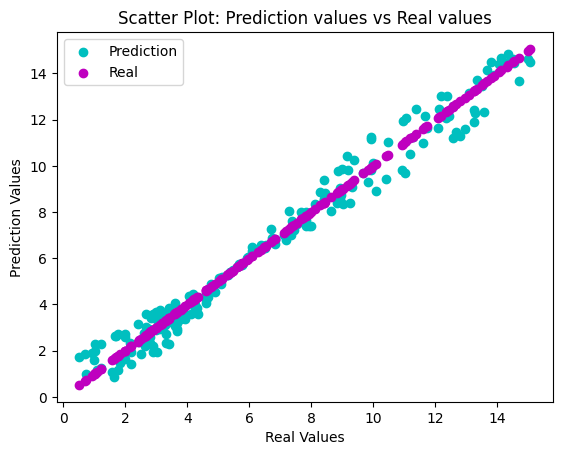

In [120]:
# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_synthetic.inverse_transform(y_pred)
denormalizedRealResults = scaler_synthetic.inverse_transform(y_test_synthetic)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [126]:
# Dataset 3: wineQuality

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')
# Fit the model to the training data
model.fit(X_train_wineQuality, y_train_wineQuality, epochs=1000, batch_size=32, verbose=2)
# Make predictions on the test set
y_pred = model.predict(X_test_wineQuality)
# We calculate the MAPE
# We will calculate the average percentage error across all data points
mape = 100 * np.mean(np.abs((y_pred - y_test_wineQuality)/y_test_wineQuality))
print("Mean absolute percentage error")
print(mape, "%")

Epoch 1/1000
163/163 - 1s - loss: 1.7881 - 1s/epoch - 7ms/step
Epoch 2/1000
163/163 - 0s - loss: 0.2544 - 270ms/epoch - 2ms/step
Epoch 3/1000
163/163 - 0s - loss: 0.0653 - 176ms/epoch - 1ms/step
Epoch 4/1000
163/163 - 0s - loss: 0.0426 - 184ms/epoch - 1ms/step
Epoch 5/1000
163/163 - 0s - loss: 0.0400 - 186ms/epoch - 1ms/step
Epoch 6/1000
163/163 - 0s - loss: 0.0397 - 226ms/epoch - 1ms/step
Epoch 7/1000
163/163 - 0s - loss: 0.0397 - 206ms/epoch - 1ms/step
Epoch 8/1000
163/163 - 0s - loss: 0.0397 - 174ms/epoch - 1ms/step
Epoch 9/1000
163/163 - 0s - loss: 0.0397 - 171ms/epoch - 1ms/step
Epoch 10/1000
163/163 - 0s - loss: 0.0397 - 181ms/epoch - 1ms/step
Epoch 11/1000
163/163 - 0s - loss: 0.0397 - 182ms/epoch - 1ms/step
Epoch 12/1000
163/163 - 0s - loss: 0.0396 - 186ms/epoch - 1ms/step
Epoch 13/1000
163/163 - 0s - loss: 0.0396 - 280ms/epoch - 2ms/step
Epoch 14/1000
163/163 - 0s - loss: 0.0396 - 183ms/epoch - 1ms/step
Epoch 15/1000
163/163 - 0s - loss: 0.0396 - 171ms/epoch - 1ms/step
Epoch 1

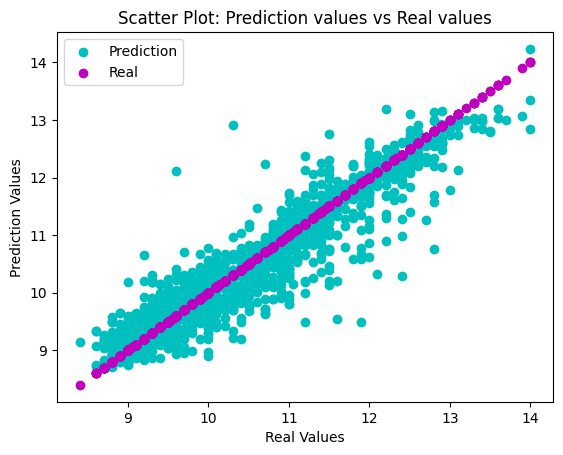

In [127]:
# De-normalize the prediction and real values
denormalizedPredictionResults = scaler_wineQuality.inverse_transform(y_pred)
denormalizedRealResults = scaler_wineQuality.inverse_transform(y_test_wineQuality)
# Scatter plot of the prediction value vs real value
# Create scatter plot
plt.scatter(denormalizedRealResults, denormalizedPredictionResults, c='c', label='Prediction')
plt.scatter(denormalizedRealResults, denormalizedRealResults, c='m', label='Real')
# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Prediction Values')
plt.title('Scatter Plot: Prediction values vs Real values')
# Add a legend
plt.legend()
# Show the plot
plt.show()